In [1]:
import pandas as pd
import numpy as np
from sqlite3 import connect
import matplotlib.pyplot as plt

In [2]:
athelets_dataset = pd.read_csv("athlete_events.csv")

In [3]:
athelets_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [97]:
athelets_dataset['NOC'] = athelets_dataset['NOC'].astype(str)
athelets_dataset['Medal'] = athelets_dataset['Medal'].astype(str)
athelets_dataset['Sex'] = athelets_dataset['Sex'].astype(str)
athelets_dataset.dropna(inplace=True)

In [5]:
countries_dataset = pd.read_csv("noc_regions.csv")

In [6]:
countries_dataset.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
conn = connect(':memory:')
athelets_dataset.to_sql('a_data',conn)

In [8]:
pd.read_sql('SELECT * FROM a_data LIMIT 5',conn)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan


In [9]:
height = pd.read_sql('SELECT `Height` FROM a_data',conn)

In [10]:
height = height.dropna()

In [11]:
height.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210945 entries, 0 to 271115
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Height  210945 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


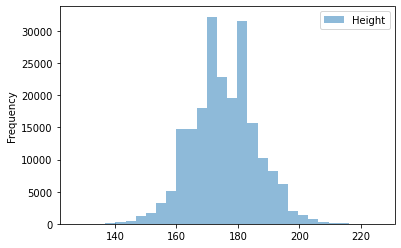

In [12]:
ax = height.plot.hist(bins=30, alpha=0.5)

In [13]:
a_data = pd.read_sql("SELECT * FROM a_data",conn)

In [14]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   271116 non-null  int64  
 1   ID      271116 non-null  int64  
 2   Name    271116 non-null  object 
 3   Sex     271116 non-null  object 
 4   Age     261642 non-null  float64
 5   Height  210945 non-null  float64
 6   Weight  208241 non-null  float64
 7   Team    271116 non-null  object 
 8   NOC     271116 non-null  object 
 9   Games   271116 non-null  object 
 10  Year    271116 non-null  int64  
 11  Season  271116 non-null  object 
 12  City    271116 non-null  object 
 13  Sport   271116 non-null  object 
 14  Event   271116 non-null  object 
 15  Medal   271116 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 33.1+ MB


In [15]:
gender_gold = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Gold
                              From a_data
                              Where Medal = 'Gold'
                              Group By Sex
                            """,conn)

In [16]:
gender_gold

,Sex,Total_Gold
0,F,3747
1,M,9625


In [17]:
gender_silver = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Silver
                              From a_data
                              Where Medal = 'Silver'
                              Group By Sex
                            """,conn)

In [18]:
gender_silver

,Sex,Total_Silver
0,F,3735
1,M,9381


In [19]:
gender_bronze = pd.read_sql("""
                            SELECT Sex, COUNT(Medal) as Total_Bronze
                              From a_data
                              Where Medal = 'Bronze'
                              Group By Sex
                            """,conn)

In [20]:
gender_bronze

,Sex,Total_Bronze
0,F,3771
1,M,9524


In [21]:
country_medal = athelets_dataset.groupby('NOC')['Medal'].count().sort_values(ascending=False)

<AxesSubplot:xlabel='NOC'>

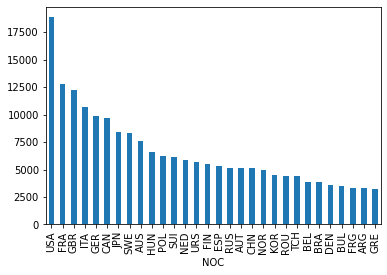

In [22]:
country_medal_30 = country_medal[:30]
country_medal_30.plot(kind='bar')

In [23]:
athelets_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan


In [24]:
year = athelets_dataset['Year']
year = year.sort_values()
year

214333    1896
244717    1896
244716    1896
23912     1896
23913     1896
          ... 
142355    2016
47729     2016
47728     2016
47746     2016
236646    2016
Name: Year, Length: 271116, dtype: int64

In [86]:
mean_data = athelets_dataset.groupby('Year').mean()
Height_mean = mean_data['Height']
Age_mean = mean_data['Age']
Weight_mean = mean_data['Weight']

<AxesSubplot:title={'center':'Mean height vs. Year'}, xlabel='Year', ylabel='Mean Height'>

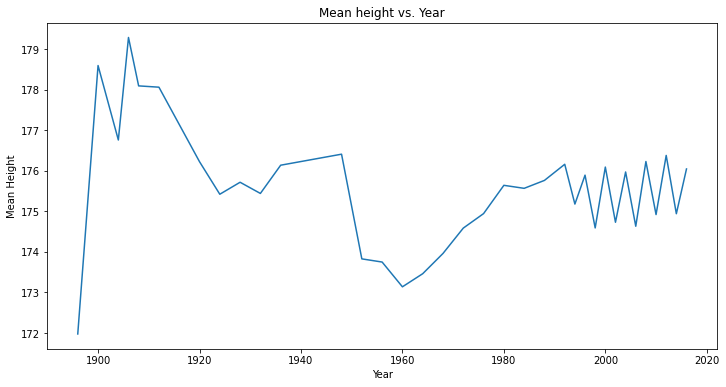

In [87]:
Height_mean.plot(kind='line',xlabel='Year', ylabel='Mean Height',figsize=(12,6),title='Mean height vs. Year')

<AxesSubplot:title={'center':'Mean age vs. Year'}, xlabel='Year', ylabel='Mean Age'>

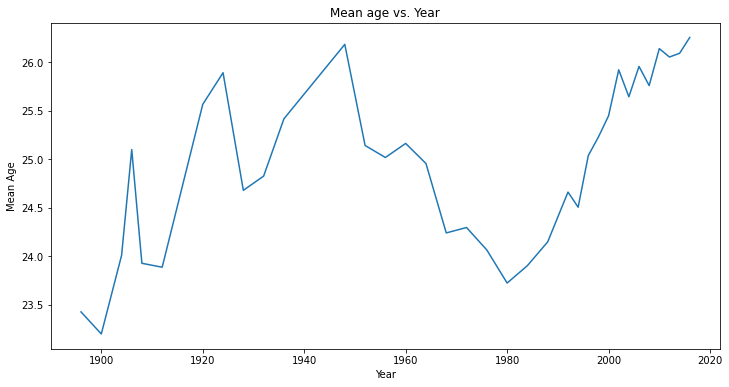

In [88]:
Age_mean.plot(kind='line',xlabel='Year', ylabel='Mean Age',figsize=(12,6), title='Mean age vs. Year')

<AxesSubplot:title={'center':'Mean weight vs. Year'}, xlabel='Year', ylabel='Mean Weight'>

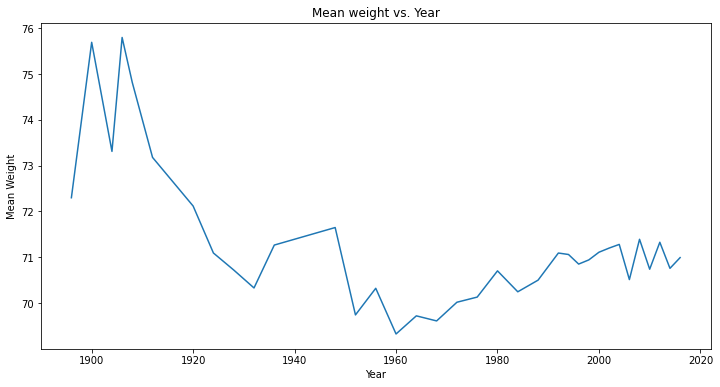

In [89]:
Weight_mean.plot(kind='line',xlabel='Year', ylabel='Mean Weight',figsize=(12,6), title='Mean weight vs. Year')

In [29]:
noc_data = athelets_dataset.groupby(['Year','NOC']).agg({'Medal':['count']})

In [30]:
athelets_dataset['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [31]:
country_medal = country_medal.reset_index()

In [32]:
country_medal

,NOC,Medal
0,USA,18853
1,FRA,12758
2,GBR,12256
3,ITA,10715
4,GER,9830
...,...,...
225,YMD,5
226,SSD,3
227,NBO,2
228,UNK,2


In [33]:
athelets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [34]:
top_30_country = []
for i in range(30):
    top_30_country.append(country_medal.iloc[i][0])
top_30_country

['USA',
 'FRA',
 'GBR',
 'ITA',
 'GER',
 'CAN',
 'JPN',
 'SWE',
 'AUS',
 'HUN',
 'POL',
 'SUI',
 'NED',
 'URS',
 'FIN',
 'ESP',
 'RUS',
 'AUT',
 'CHN',
 'NOR',
 'KOR',
 'ROU',
 'TCH',
 'BEL',
 'BRA',
 'DEN',
 'BUL',
 'FRG',
 'ARG',
 'GRE']

In [35]:
USA_medal = athelets_dataset[(athelets_dataset['NOC'] == 'USA') & (athelets_dataset['Medal'] == 'Gold') | (athelets_dataset['Medal'] == 'Silver') | (athelets_dataset['Medal'] == 'Bronze')]

In [36]:
USA_medal = USA_medal.groupby('Year')['Medal'].count()

<AxesSubplot:xlabel='Year'>

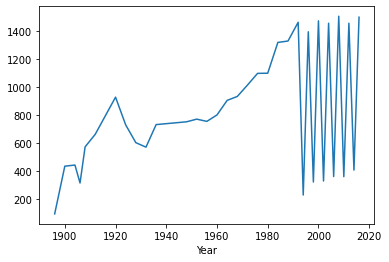

In [37]:
USA_medal.plot()

In [103]:
USA_medal = athelets_dataset[(athelets_dataset['NOC'] == 'USA') & (athelets_dataset['Medal'] == 'Gold') | (athelets_dataset['Medal'] == 'Silver') | (athelets_dataset['Medal'] == 'Bronze')]
CHN_medal = athelets_dataset[(athelets_dataset['NOC'] == 'CHN') & (athelets_dataset['Medal'] != 'nan')]
CHN_medal = CHN_medal[(CHN_medal['Medal'] == 'Gold') | (CHN_medal['Medal'] == 'Silver') | (CHN_medal['Medal'] == 'Bronze')]
CHN_medal = CHN_medal.groupby('Year')['Medal'].count()
CHN_medal = CHN_medal.reset_index()
CHN_medal

,Year,Medal
0,1984,74
1,1988,52
2,1992,81
3,1994,3
4,1996,106
5,1998,14
6,2000,79
7,2002,16
8,2004,94
9,2006,13


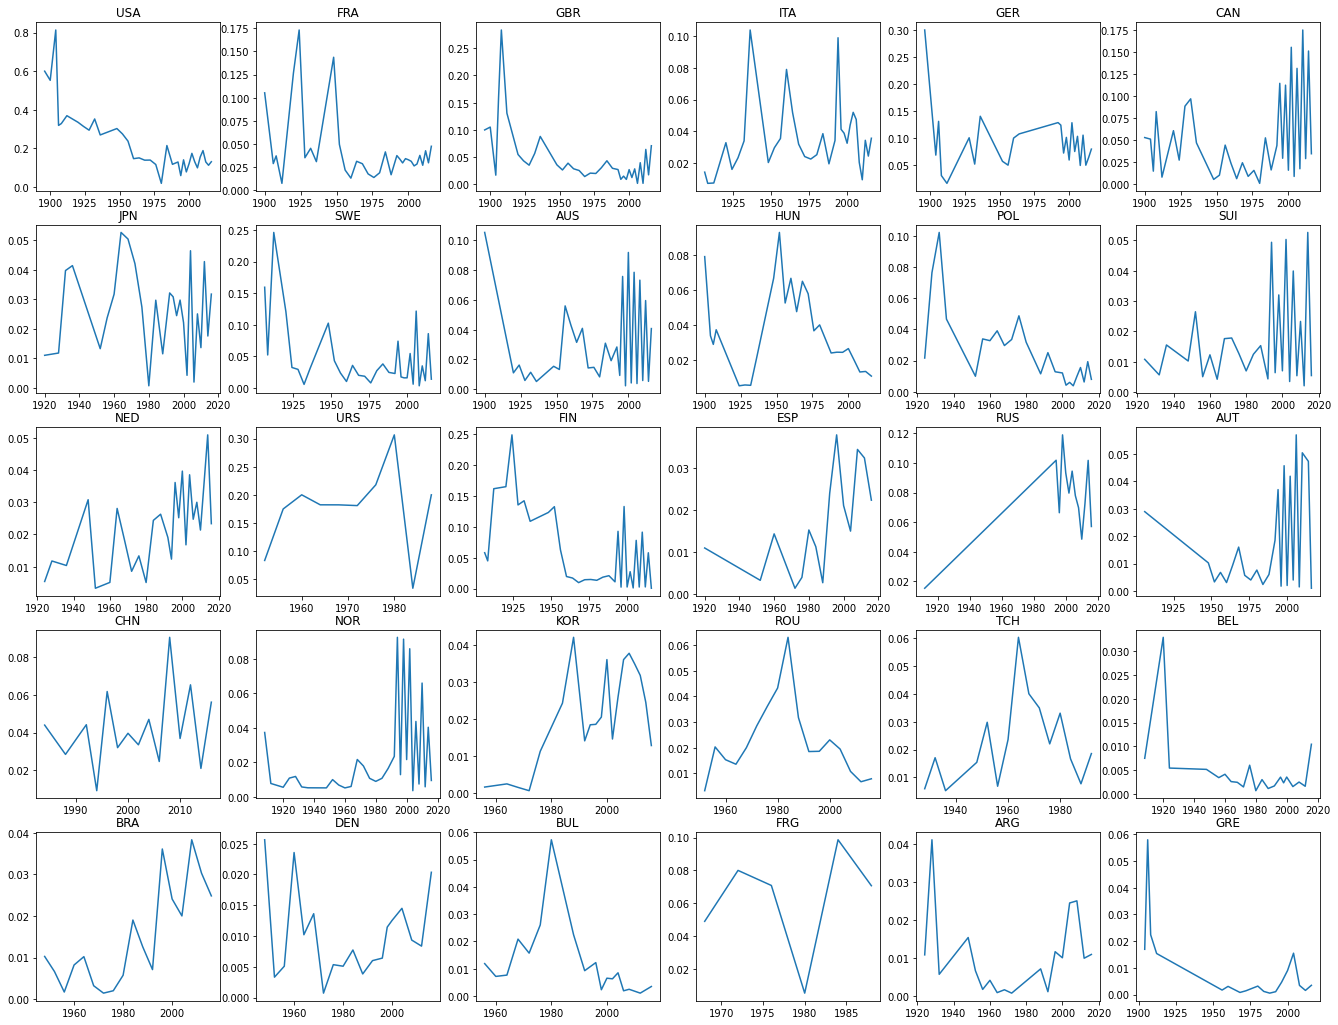

In [156]:
year_medal_total = athelets_dataset[athelets_dataset['Medal'] != 'nan']
year_medal_total = year_medal_total.groupby('Year')['Medal'].count()
year_medal_total = year_medal_total.reset_index()

plt.figure(figsize=(23,18))
for c in range(len(top_30_country)):
    p = []
    medal = athelets_dataset[(athelets_dataset['NOC'] == top_30_country[c]) & (athelets_dataset['Medal'] != 'nan')]
    medal = medal[(medal['Medal'] == 'Gold') | (medal['Medal'] == 'Silver') | (medal['Medal'] == 'Bronze')]
    medal = medal.groupby('Year')['Medal'].count()
    medal = medal.reset_index()
    for i in range(len(medal['Year'])):
        p.append(medal.iloc[i,1]/int(year_medal_total[year_medal_total['Year'] == medal.iloc[i,0]]['Medal']))
    medal['Percent'] = p
    plt.subplot(5,6,c+1)
    plt.plot(medal['Year'],medal['Percent'])
    plt.gca().set_title(top_30_country[c])

plt.show()


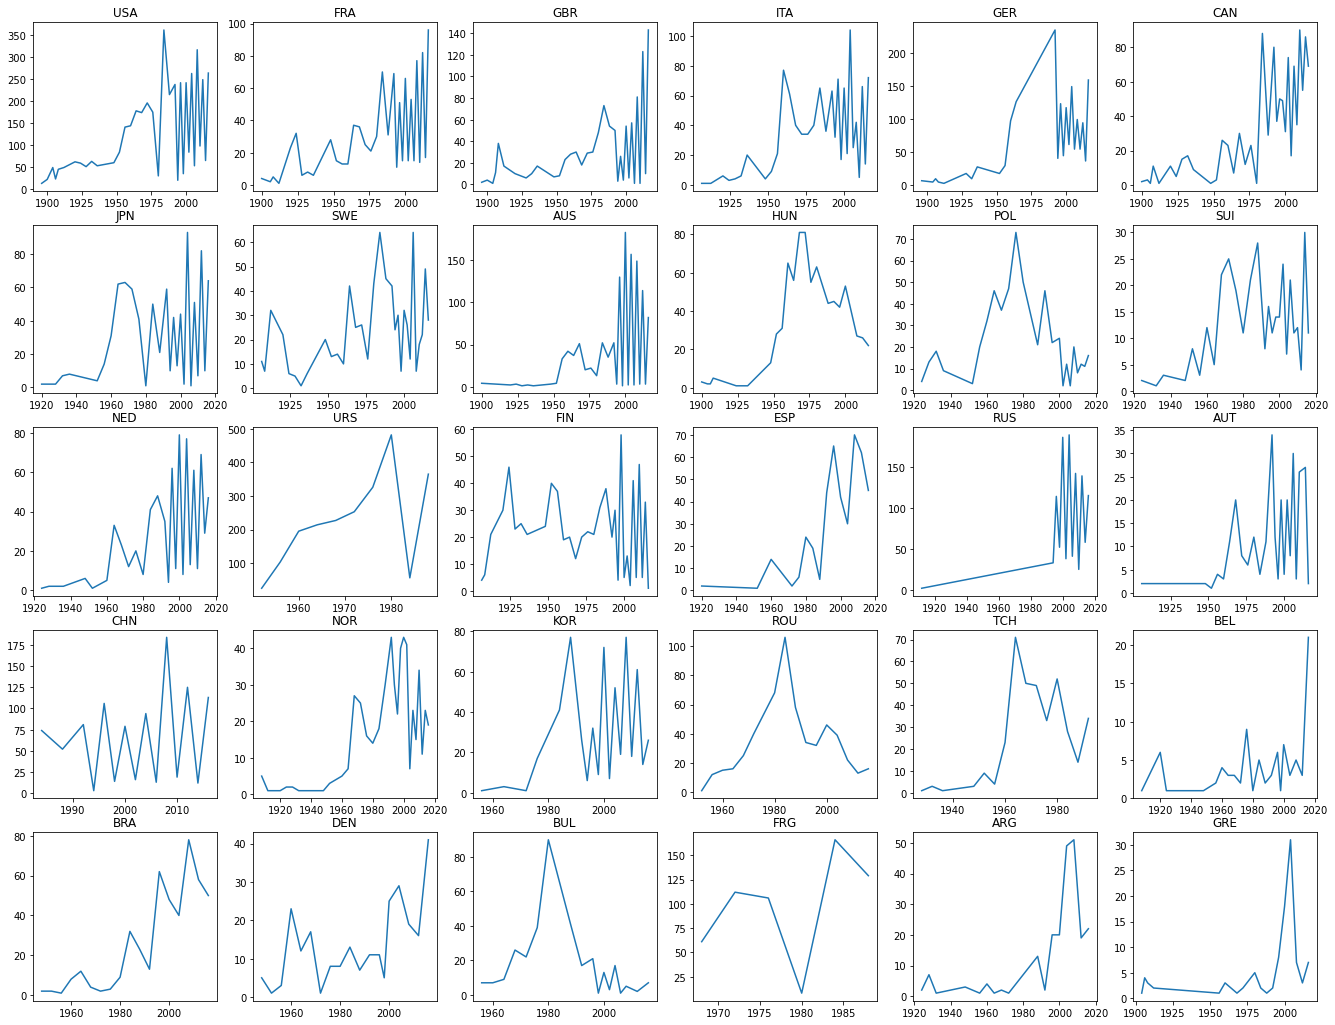

In [157]:
plt.figure(figsize=(23,18))
for c in range(len(top_30_country)):
    p = []
    medal = athelets_dataset[(athelets_dataset['NOC'] == top_30_country[c]) & (athelets_dataset['Medal'] != 'nan')]
    medal = medal[(medal['Medal'] == 'Gold') | (medal['Medal'] == 'Silver') | (medal['Medal'] == 'Bronze')]
    medal = medal.groupby('Year')['Medal'].count()
    medal = medal.reset_index()
    plt.subplot(5,6,c+1)
    plt.plot(medal['Year'],medal['Medal'])
    plt.gca().set_title(top_30_country[c])

plt.show()

[0.043969102792632206, 0.028461959496442254, 0.04416575790621592, 0.009259259259259259, 0.06173558532323821, 0.032036613272311214, 0.03963873557451079, 0.033542976939203356, 0.047, 0.024714828897338403, 0.09041769041769042, 0.036893203883495145, 0.06527415143603134, 0.021052631578947368, 0.05610724925521351]


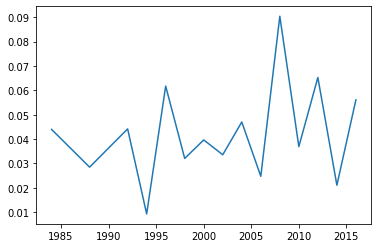

In [152]:
year_medal_total = athelets_dataset[athelets_dataset['Medal'] != 'nan']
year_medal_total = year_medal_total.groupby('Year')['Medal'].count()
year_medal_total = year_medal_total.reset_index()

#CHN_medal['percent'] = CHN_medal['Medal'] / year_medal_total['Medal']
p = []
for i in range(len(CHN_medal['Year'])):
    #print(CHN_medal.iloc[i,0])
    p.append(CHN_medal.iloc[i,1]/int(year_medal_total[year_medal_total['Year'] == CHN_medal.iloc[i,0]]['Medal']))
print(p)
CHN_medal['Percent'] = p
plt.plot(CHN_medal['Year'],CHN_medal['Percent'])


In [159]:
year_medal_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    35 non-null     int64
 1   Medal   35 non-null     int64
dtypes: int64(2)
memory usage: 688.0 bytes


In [124]:
CHN_medal.head(2)

,Year,Medal,percent
0,1984,74,3.700000
1,1988,52,1.368421
